# Testing and interactive learning module

This notebook includes the code and implementation of the interactive learning feature for this project. It explains how you can draw your own digits and ask the model to predict them. If the model's prediction is incorrect, you can provide feedback, allowing the model to learn from your example and improve its accuracy.

***

## Neural network and model

The neural network and model is described in the `train_model.ipynb` file. 

***

## Code and Usage

Below is the code and the procedure to use the model.

### Importing necessary libraries and functions

In [10]:
import numpy as np
from utils import preprocess_image, load_params, make_prediction, plot_image_with_prediction, display_error_and_wait, learn_from_input

### Loading the trained parameters

We load the params we got from training the model in `train_model.ipynb`.

In [11]:
W1, b1, W2, b2, W3, b3 = load_params('model_weights')

### Interactive Learning Function

This is the driver function that runs the interactive learning module. Here is a breakdown of how this function works:

- The function takes `image_path` as a parameter (default set to `test_image.png`). This image is preprocessed and converted into a vector using the `preprocess_image()` function.
- The image vector (`img_vector`) is then passed into the model to make a prediction using the `make_prediction()` function.
- The prediction is plotted using `matplotlib`.
- The user is prompted to confirm if the model's prediction is correct.
- If the model's prediction is incorrect, the code uses this as a training example and updates the model accordingly.
- If the model's prediction is correct, the code exits normally.

In [12]:
# defining an interactive learning model
def interactive_learning(image_path, W1, b1, W2, b2, W3, b3):
    # creating an image vector
    img_vector = preprocess_image(image_path)
    img_vector = img_vector.reshape(1, -1)

    # making a prediction
    prediction = make_prediction(W1, b1, W2, b2, W3, b3, img_vector)
    print(f'Predicted number: {prediction}')
    plot_image_with_prediction(prediction)  # plotting the prediction

    # declaring variables
    is_input_correct = ""
    correct_prediction = 0

    # keep asking till the user enters correct input
    while True:
        try:
            is_input_correct = input('Was the prediction correct? (y/n): ').lower()
            if is_input_correct in ['y', 'n']:
                break
            else:
                raise ValueError
        except ValueError:
            display_error_and_wait('Incorrect input. Please enter y or n.')

    # if the prediction was incorrect
    if is_input_correct == 'n':
        # keep asking till the user enters correct input
        while True:
            try:
                correct_prediction = int(input('What is the correct prediction? [0-9]: '))
                if 0 <= correct_prediction <= 9:
                    break
                else:
                    raise ValueError
            except ValueError:
                display_error_and_wait('Incorrect input. Please enter a number between 0 and 9.')
        W1, b1, W2, b2, W3, b3 = learn_from_input(W1, b1, W2, b2, W3, b3, img_vector, correct_prediction, 0.1)
        print('Learned successfully')
    else:
        print("\033[1;32;40m Great! The model predicted correctly. Thank you. \n")
    return W1, b1, W2, b2, W3, b3


### How to Use the Model for Yourself

To provide a custom input to the model, follow these steps:

1. Open `test_image.png` in Paint or your preferred image editing software.
2. Clear the previous drawing and create your own input using white color on a black canvas.
3. If you wish to change the input image's name or path, specify the appropriate path and pass it to the function.

Predicted number: [1]


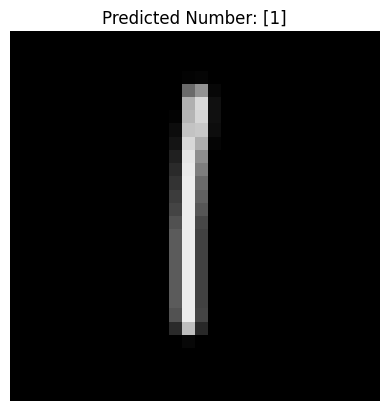

 Great! The model predicted correctly. Thank you. 



In [13]:
W1, b1, W2, b2, W3, b3 = interactive_learning('test_image.png', W1, b1, W2, b2, W3, b3)